### Foreword

Hi guys, this is a visualisation of a Whatsapp chat. I used one of my WA groups as the dataset. For those who are interested in doing similar thing, you can look through this piece and feel free to ask questions. For the less geeky one, just skip the codes

### Getting the dataset
How to get WA chat data:
- Open WA app on your mobile phone
- Click setting and choose *Email chat*
- Email it to yourself

How to convert WA chat file (.txt) to csv:
- Go to [link](https://github.com/MaxKusnadi/whatsapp-analyzer) and download *text_to_csv.py*
- Change the variable *TEXT_LOCATION* to your txt location and *CSV_LOCATION* to your csv location.
- Run the program. I use Python 3.5


## Preprocessing

In [1]:
# Importing pandas and ggplot
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.set_style("whitegrid")
sns.set(font_scale=1.5)

In [3]:
# Open the csv file
data = pd.read_csv("../data/PINUS.csv")

In [4]:
data.head()

Date   Name                                          Text
0  17/06/2016 16:40  Denny                                   Dun dun dun
1  17/06/2016 16:40  Denny                               Drumroll please
2  17/06/2016 16:40  Denny                                           🎉🎉🎉
3  17/06/2016 16:40  Denny                                 Welcome peeps
4  17/06/2016 16:41  Denny   Congrats for each of your assigned position

In [5]:
# Convert Date string to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y %H:%M")

In [6]:
data.head()

Date   Name                                          Text
0 2016-06-17 16:40:00  Denny                                   Dun dun dun
1 2016-06-17 16:40:00  Denny                               Drumroll please
2 2016-06-17 16:40:00  Denny                                           🎉🎉🎉
3 2016-06-17 16:40:00  Denny                                 Welcome peeps
4 2016-06-17 16:41:00  Denny   Congrats for each of your assigned position

## Total Chats

In [7]:
data.shape

(6411, 3)

**6411** chats

## Total Media Shared (Videos, Pictures, etc)

In [8]:
data['Text'][data['Text'] == ' <Media omitted>'].shape

(117,)

**117** media shared

# Most Active Members
Calculated based on how many times a person speaks

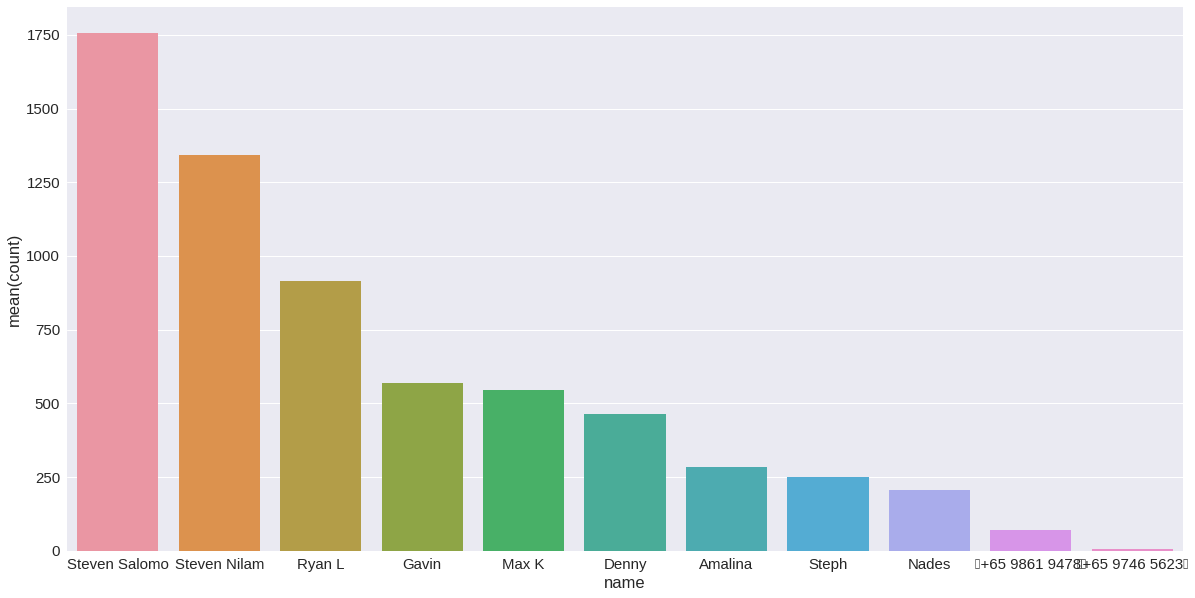

In [9]:
active_members = data['Name'].value_counts()

df = pd.DataFrame({'name': active_members.index, 'count': active_members.values})

plot = sns.barplot(x="name", y="count", data=df)
plot.figure.set_size_inches(20,10)

# Members with the Highest Number of Words Written
Calculated based the number of words written by a person

In [10]:
# -1 because of some whitespace problems
def count_words(text):
    words = text.split(" ")
    return len(words) - 1

In [11]:
# WA does not capture media (video etc) in its text file. 
# Instead, all the media shared is replaced by <Media ommited>
# We have to clean it for fairness sake

data_words = data[data['Text'] != ' <Media omitted>']

In [12]:
data_words['No_of_words'] = data_words['Text'].apply(count_words)

/home/max/project/whatsapp-analyzer/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
data_words.head()

Date   Name                                          Text  \
0 2016-06-17 16:40:00  Denny                                   Dun dun dun   
1 2016-06-17 16:40:00  Denny                               Drumroll please   
2 2016-06-17 16:40:00  Denny                                           🎉🎉🎉   
3 2016-06-17 16:40:00  Denny                                 Welcome peeps   
4 2016-06-17 16:41:00  Denny   Congrats for each of your assigned position   

   No_of_words  
0            3  
1            2  
2            1  
3            2  
4            7

In [14]:
df = pd.DataFrame()
df['Name'] = data_words['Name'].unique()

In [15]:
def sum_words(name):
    count = data_words['No_of_words'][data_words['Name'] == name].sum()
    return count

In [16]:
df['Total words'] = df['Name'].apply(sum_words)

In [17]:
df = df.sort_values('Total words', ascending=False)

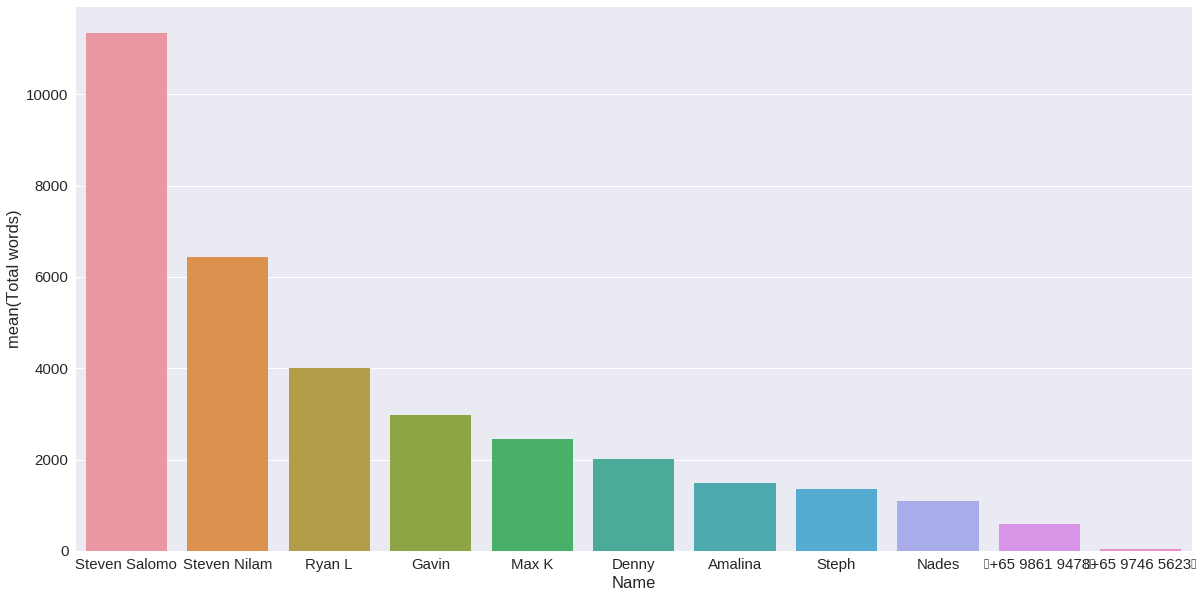

In [18]:
plot = sns.barplot(x="Name", y="Total words", data=df)
plot.figure.set_size_inches(20,10)

# Members with the Highest Number of Words per Chats

In [21]:
active_members = data['Name'].value_counts()
def count_average(name):
    words = df['Total words'][df['Name'] == name].sum()
    total = active_members[name]
    return words/total

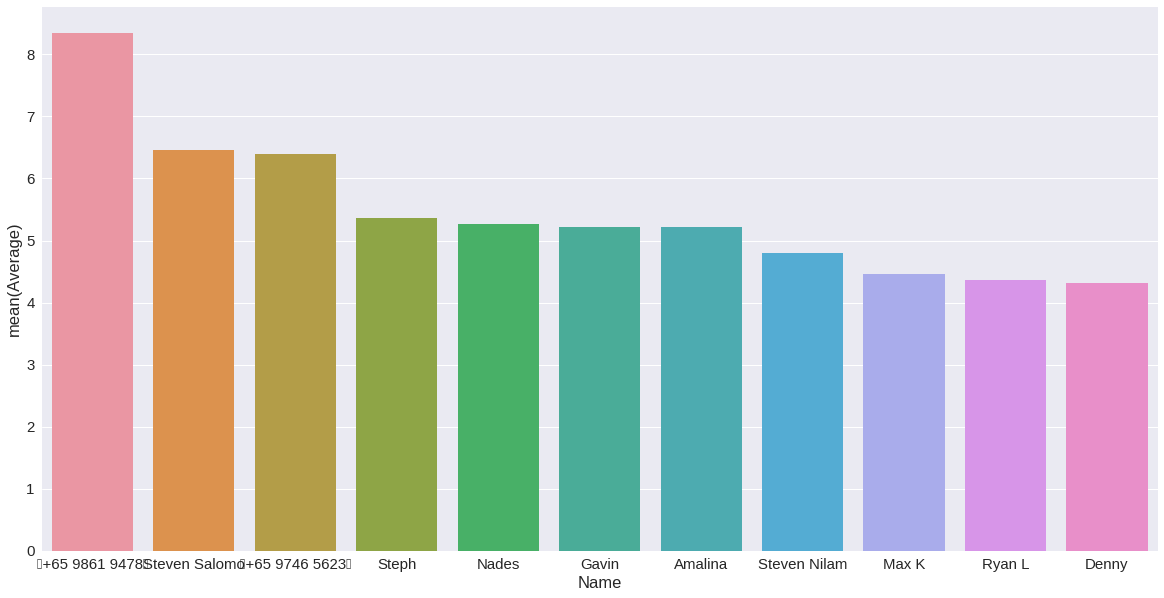

In [22]:
df['Average'] = df['Name'].apply(count_average)
df = df.sort_values('Average', ascending=False)
plot = sns.barplot(x="Name", y="Average", data=df)
plot.figure.set_size_inches(20,10)

# Favourite Word (No Threshold)

In [23]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=15, max_df=1.0)

In [24]:
vect.fit(data_words['Text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=15,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
text_dtm = vect.transform(data_words['Text'])
text_dtm

<6294x374 sparse matrix of type '<class 'numpy.int64'>'
	with 19979 stored elements in Compressed Sparse Row format>

In [26]:
word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

In [27]:
word_freq_df.sort_values('occurrences', ascending=False)

occurrences      term
128          945        gw
361          693        ya
370          502        yg
111          449        ga
130          398      haha
90           378        di
7            303       ada
175          259      kalo
10           241       aja
217          232       mau
131          204    hahaha
127          200      guys
156          198       itu
101          197        eh
202          183       lol
61           181      buat
204          181        lu
181          174      kita
16           171       and
309          163       sih
60           161       btw
260          159       oke
86           151       deh
46           145      bisa
246          141      ntar
6            139        ad
338          136        tp
26           133     bakal
57           130        bs
151          129       ini
..           ...       ...
78            16   confirm
124           16        gt
259           16      okay
305           16       sia
69            16      case
316           16    soalny
66            16        by
254           16    nyampe
205           16     lunch
326           16     telat
285           16       pny
159           16   jadinya
242           16     nitip
365           15      yall
208           15       mac
164           15       jem
162           15        jb
209           15      main
45            15  birthday
48            15      bnyk
321           15     stuff
195           15       let
56            15      brpa
15            15      anak
23            15      ayer
72            15     check
348           15    upload
339           15  transfer
143           15       how
118           15      gmna

[374 rows x 2 columns]

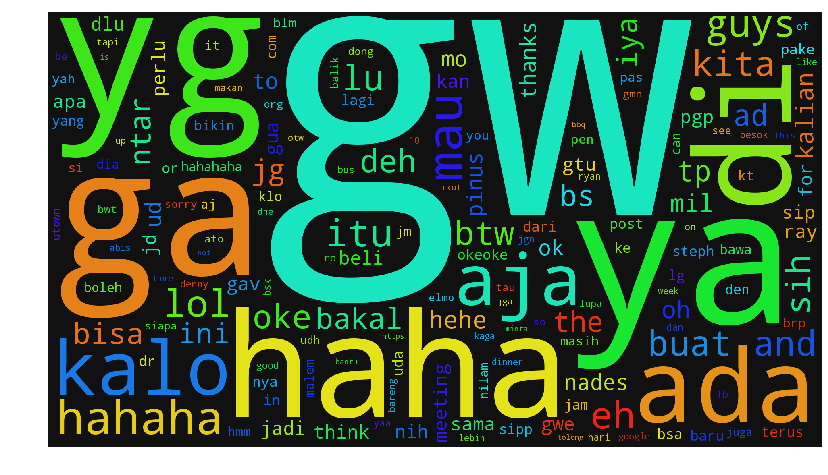

In [28]:
wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# **NOT MEANINGFUL**

# Favourite Word 3.0 (Max Threshold=100)

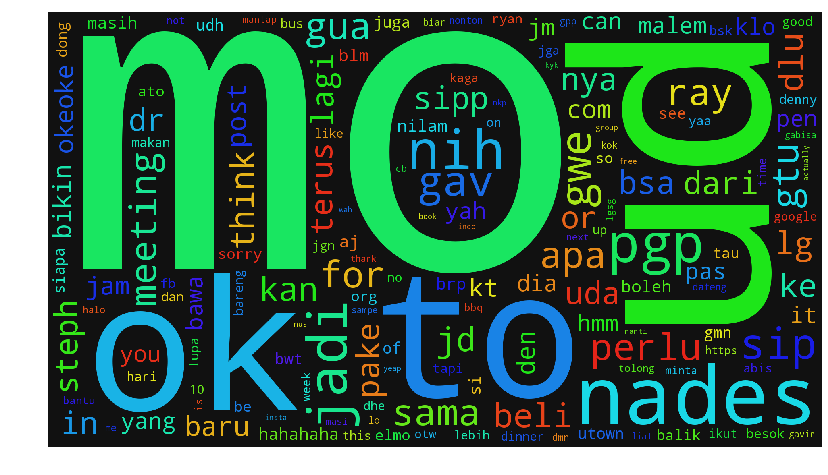

In [29]:
vect = CountVectorizer(min_df=15, max_df=100)
text_dtm = vect.fit_transform(data_words['Text'])
word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Number of Chats over Time

In [30]:
data['Short Date'] = data['Date'].apply(lambda x:x.date().strftime('%m/%Y'))
data['Short Date'] = pd.to_datetime(data['Short Date'], format="%m/%Y")
data

Date             Name  \
0    2016-06-17 16:40:00            Denny   
1    2016-06-17 16:40:00            Denny   
2    2016-06-17 16:40:00            Denny   
3    2016-06-17 16:40:00            Denny   
4    2016-06-17 16:41:00            Denny   
5    2016-06-17 16:41:00            Denny   
6    2016-06-17 16:41:00            Denny   
7    2016-06-17 16:42:00            Denny   
8    2016-06-17 16:44:00            Denny   
9    2016-06-17 16:44:00            Denny   
10   2016-06-17 16:45:00            Denny   
11   2016-06-17 16:45:00            Denny   
12   2016-06-17 16:45:00            Denny   
13   2016-06-17 16:46:00            Denny   
14   2016-06-17 17:12:00           Ryan L   
15   2016-06-17 17:13:00     Steven Nilam   
16   2016-06-17 17:13:00           Ryan L   
17   2016-06-17 17:14:00  ‪+65 9861 9478‬   
18   2016-06-17 17:14:00  ‪+65 9861 9478‬   
19   2016-06-17 17:14:00            Denny   
20   2016-06-17 17:14:00            Denny   
21   2016-06-17 17:14:00  ‪+65 9861 9478‬   
22   2016-06-17 17:15:00  ‪+65 9861 9478‬   
23   2016-06-17 17:15:00  ‪+65 9861 9478‬   
24   2016-06-17 17:16:00  ‪+65 9861 9478‬   
25   2016-06-17 17:16:00  ‪+65 9861 9478‬   
26   2016-06-17 17:16:00  ‪+65 9861 9478‬   
27   2016-06-17 17:31:00            Nades   
28   2016-06-17 17:34:00  ‪+65 9746 5623‬   
29   2016-06-17 17:41:00            Steph   
...                  ...              ...   
6381 2017-02-13 13:05:00    Steven Salomo   
6382 2017-02-13 13:07:00            Max K   
6383 2017-02-13 13:37:00    Steven Salomo   
6384 2017-02-13 13:37:00    Steven Salomo   
6385 2017-02-13 13:44:00            Max K   
6386 2017-02-13 13:44:00            Max K   
6387 2017-02-13 13:45:00            Max K   
6388 2017-02-13 13:58:00    Steven Salomo   
6389 2017-02-13 14:05:00     Steven Nilam   
6390 2017-02-13 14:05:00            Max K   
6391 2017-02-13 14:05:00            Max K   
6392 2017-02-13 14:11:00          Amalina   
6393 2017-02-13 14:12:00          Amalina   
6394 2017-02-13 16:10:00    Steven Salomo   
6395 2017-02-13 16:10:00    Steven Salomo   
6396 2017-02-13 16:25:00     Steven Nilam   
6397 2017-02-13 16:30:00            Steph   
6398 2017-02-13 16:30:00            Steph   
6399 2017-02-13 16:46:00            Denny   
6400 2017-02-13 16:58:00    Steven Salomo   
6401 2017-02-13 16:59:00    Steven Salomo   
6402 2017-02-13 16:59:00    Steven Salomo   
6403 2017-02-13 16:59:00    Steven Salomo   
6404 2017-02-13 17:42:00           Ryan L   
6405 2017-02-13 17:46:00            Max K   
6406 2017-02-13 17:49:00           Ryan L   
6407 2017-02-13 17:49:00           Ryan L   
6408 2017-02-13 18:05:00          Amalina   
6409 2017-02-13 18:08:00            Max K   
6410 2017-02-13 18:08:00            Max K   

                                                   Text Short Date  
0                                           Dun dun dun 2016-06-01  
1                                       Drumroll please 2016-06-01  
2                                                   🎉🎉🎉 2016-06-01  
3                                         Welcome peeps 2016-06-01  
4           Congrats for each of your assigned position 2016-06-01  
5                                Formalitas aja lah yah 2016-06-01  
6                                    I'm Denny yr 2 ISE 2016-06-01  
7                  Yuk yuk let's get to know each other 2016-06-01  
8      Just sharing a bit I ran for pinus because I ... 2016-06-01  
9            As for hobby I hv quite a range of hobbies 2016-06-01  
10           Pokemon for example ( wink wink Ryan ) lol 2016-06-01  
11                         Jadi yg lain jga kenalan yah 2016-06-01  
12     These people here will be our FAMILY for the ... 2016-06-01  
13     Okaay enough of me talking. Silakan2 diramein... 2016-06-01  
14                                          Hai guys 🙋🏻 2016-06-01  
15                                              Halo2!  2016-06-01  
16                                     Ryan yr3 MechEng 

In [31]:
data['date_int'] = data['Short Date'].astype(np.int64)

In [32]:
date_count = data['date_int'].value_counts()
df = pd.DataFrame({'date':date_count.index, 'count':date_count.values})

In [33]:
df['real_date'] = df['date'].apply(lambda x: data['Short Date'][data['date_int'] == x].values[0])
df = df.sort_values('real_date')
df['real_date'] = df['real_date'].dt.strftime('%b/%y')
df

count                 date real_date
8     72  1464739200000000000    Jun/16
7     91  1467331200000000000    Jul/16
1   1526  1470009600000000000    Aug/16
0   1796  1472688000000000000    Sep/16
2   1053  1475280000000000000    Oct/16
5    410  1477958400000000000    Nov/16
6     94  1480550400000000000    Dec/16
3    940  1483228800000000000    Jan/17
4    429  1485907200000000000    Feb/17

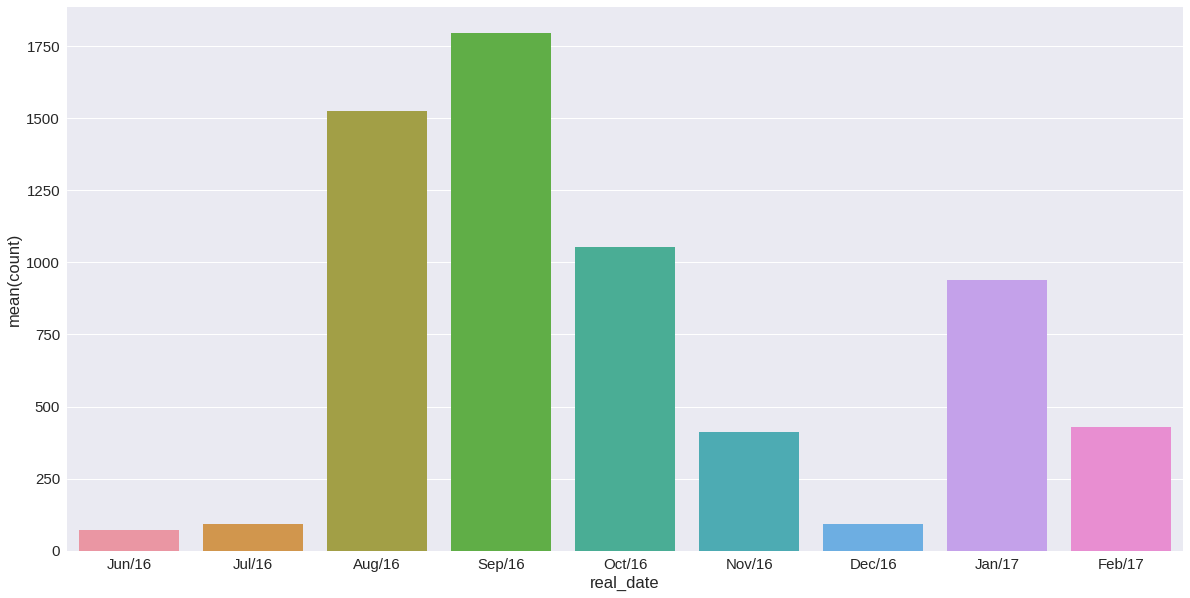

In [34]:
plot = sns.barplot(x="real_date", y="count", data=df)
plot.figure.set_size_inches(20,10)

# PEAK HOUR

In [35]:
data['Short Time'] = data['Date'].apply(lambda x:x.time().strftime('%H'))
data['Short Time'] = pd.to_datetime(data['Short Time'], format="%H")

data['time_int'] = data['Short Time'].astype(np.int64)

date_count = data['time_int'].value_counts()
df = pd.DataFrame({'time':date_count.index, 'count':date_count.values})

df['real_date'] = df['time'].apply(lambda x: data['Short Time'][data['time_int'] == x].values[0])
df = df.sort_values('real_date')
df['real_date'] = df['real_date'].dt.strftime('%H')
df

count                 time real_date
0     589 -2208988800000000000        00
14    193 -2208985200000000000        01
21      5 -2208981600000000000        02
19      9 -2208978000000000000        03
20      6 -2208967200000000000        06
18     10 -2208963600000000000        07
17     80 -2208960000000000000        08
15    176 -2208956400000000000        09
16    151 -2208952800000000000        10
2     563 -2208949200000000000        11
4     492 -2208945600000000000        12
8     368 -2208942000000000000        13
13    217 -2208938400000000000        14
11    303 -2208934800000000000        15
6     417 -2208931200000000000        16
12    291 -2208927600000000000        17
3     503 -2208924000000000000        18
9     360 -2208920400000000000        19
10    311 -2208916800000000000        20
7     370 -2208913200000000000        21
1     577 -2208909600000000000        22
5     420 -2208906000000000000        23

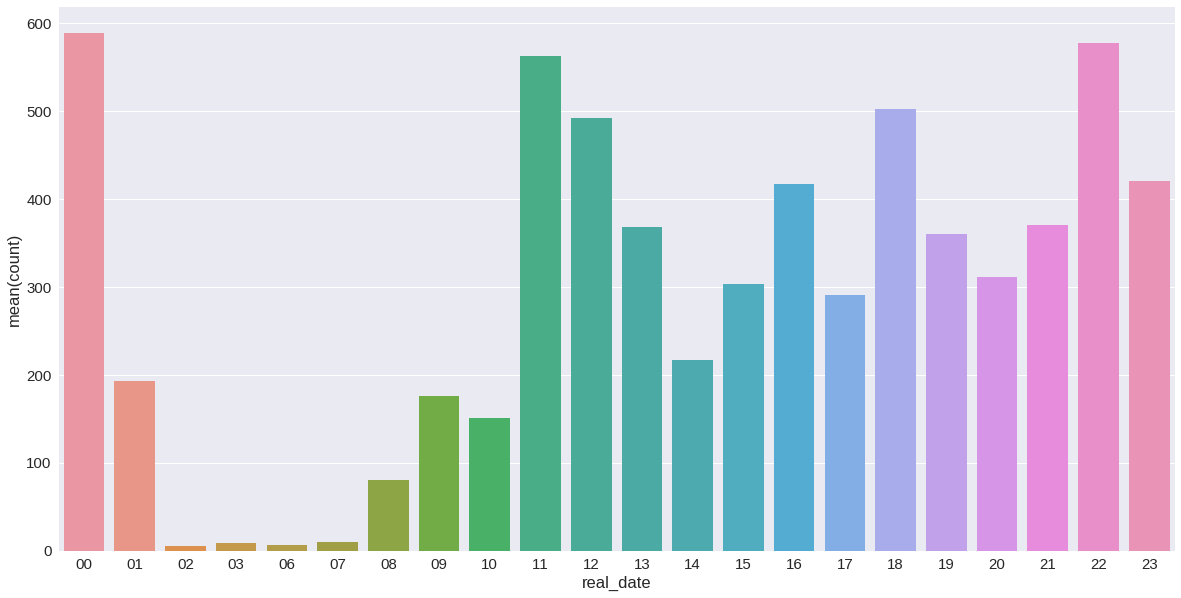

In [36]:
plot = sns.barplot(x="real_date", y="count", data=df)
plot.figure.set_size_inches(20,10)

## Active on midnight?